In [1]:
import sys
sys.path.insert(0,'/glade/u/home/abaker/repos/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline

import os

# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2


In [2]:
hdf_pp = os.environ["HDF5_PLUGIN_PATH"]
env_list = ['export HDF5_PLUGIN_PATH='+hdf_pp]
env_list

['export HDF5_PLUGIN_PATH=/glade/work/haiyingx/H5Z-ZFP-PLUGIN-unbiased/plugin']

Start DASK...and connect to client

In [3]:
from dask.distributed import Client
from ncar_jobqueue import NCARCluster

#cluster = NCARCluster(project='NTDD0004', env_extra=['export HDF5_PLUGIN_PATH="/glade/work/haiyingx/hdf/h5pl-1.12.1-Linux/HDF_Group/HDF5/1.12.1/lib/plugin/"'])
cluster = NCARCluster(project='NTDD0004', env_extra=env_list)

# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=30)
cluster
client = Client(cluster)

/glade/u/apps/opt/conda/envs/npl/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [4]:
col_cloud = ldcpy.open_datasets("cam-fv",
                                ["CLOUD"],
                                 [  "/glade/p/cisl/asap/CAM_lossy_test_data_31/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_all/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5_3Ddata_with_2Dchunking/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_all/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.CLOUD.200601-201012.nc",
                                 ],["orig", "p24_hdf5", "p24_pc", "p24_hdf5_2d", "p10_pc"])

dataset size in GB 1.99



In [5]:
ds = col_cloud.isel(time=0)

In [6]:
# get the orig dataset
cloud_orig = col_cloud["CLOUD"].sel(collection="orig")
cloud_orig.attrs["data_type"] = col_cloud.data_type
cloud_orig.attrs["set_name"] = "orig"
ds_calcs_across_space = ldcpy.Datasetcalcs(cloud_orig, "cam-fv", ["lat", "lon", "lev"])

In [7]:
my = ds_calcs_across_space.get_calc("min_abs_nonzero").isel(time=0)
my.data.compute()

4.68547021927751e-13

In [8]:
co = ds["CLOUD"].sel(collection="orig")
cz = ds["CLOUD"].sel(collection="p24_hdf5")



In [9]:
cod5 = co.data[5,:,:].compute()
cod1 = co.data[1,:,:].compute()
cod4 = co.data[4,:,:].compute()
cod3 = co.data[3,:,:].compute()
cod6 = co.data[6,:,:].compute()


In [10]:
import numpy as np
ncod1 = cod1[np.where(cod1!= 0)]
ncod5 = cod5[np.where(cod5!= 0)]
ncod4 = cod4[np.where(cod4!= 0)]
ncod3 = cod3[np.where(cod3!= 0)]
ncod6 = cod6[np.where(cod6!= 0)]



In [11]:
t = np.floor((np.log10(ncod6)))
print(t.min())
print(t.max())

-9.0
-2.0


In [65]:
ncod3

array([1.45038375e-05, 1.86781817e-05, 1.43121758e-06, 1.27687315e-07,
       9.89335331e-06, 2.71301287e-05, 1.67825365e-05, 2.58816308e-05,
       1.77780350e-06, 1.43619792e-08, 3.10911155e-08, 1.38159139e-05,
       5.88219918e-05, 9.87846579e-05, 1.85448444e-05, 2.54266820e-06,
       1.40210247e-07, 1.15317150e-07, 1.07105495e-06, 1.28508673e-05,
       1.66911814e-05, 1.73682911e-05, 1.25365041e-05, 5.49626202e-06,
       1.51778011e-06, 4.20650304e-06, 2.15987548e-05, 1.08606888e-04,
       8.96987040e-05, 1.80170136e-05, 3.46431239e-06, 1.31889806e-06,
       2.16085184e-07, 1.90396250e-07, 7.09808717e-07, 5.00093734e-07,
       3.13566147e-07, 1.72556170e-07, 3.56570311e-08, 9.58254168e-06,
       1.16936790e-05, 3.63769250e-05, 5.52633428e-05, 6.03661356e-05,
       4.84753837e-05, 4.42340424e-05, 2.84995258e-05, 1.96344827e-05,
       1.10564006e-05, 2.70174542e-06, 4.90627258e-07, 2.31737772e-07,
       1.37600097e-07, 3.71544911e-06, 4.19067946e-05, 1.09914763e-04,
      

In [12]:
diffc = ldcpy.Diffcalcs(co, cz, "cam-fv", aggregate_dims=["lat", "lon"])


In [13]:
ssim_fp = diffc.get_diff_calc('ssim_fp')


In [14]:
ssim_fp

0.8086757980660618

In [16]:
r = diffc._ssim_levs
r

array([0.96566492, 0.96609983, 1.        , 1.        , 0.93416307,
       0.8086758 , 1.        , 1.        , 1.        , 0.99998028,
       0.99999999, 1.        , 0.99999972, 0.99999937, 0.99999977,
       0.99999844, 0.99999973, 0.99999981, 0.99999943, 0.99999977,
       0.99999675, 0.99999986, 0.99999968, 0.99999975, 0.99999982,
       0.99999985, 0.99999979, 0.99999954, 0.99999999, 0.99984726])

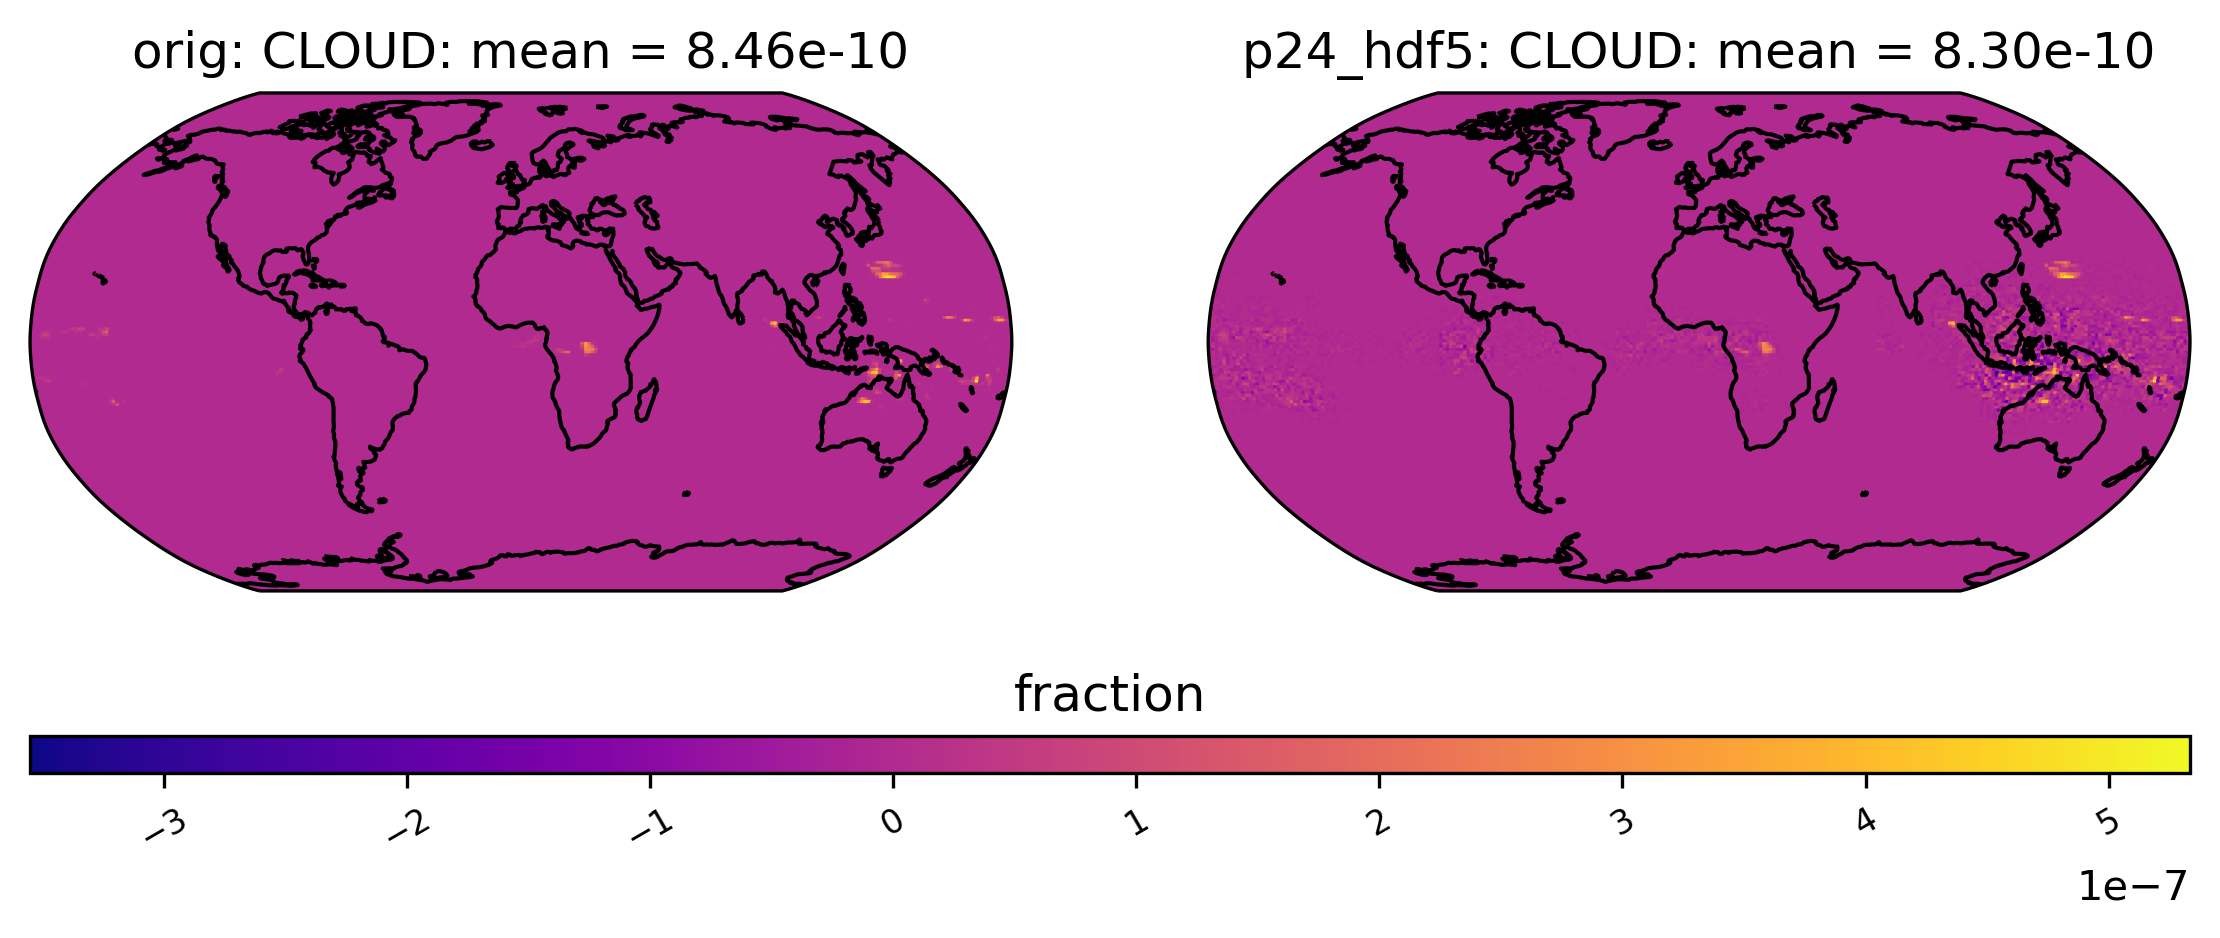

In [41]:
ldcpy.plot(
    col_cloud,
    "CLOUD",
    sets=["orig", "p24_hdf5"],
    calc="mean", color="plasma",
    lev=5, start = 0, end = 1
)

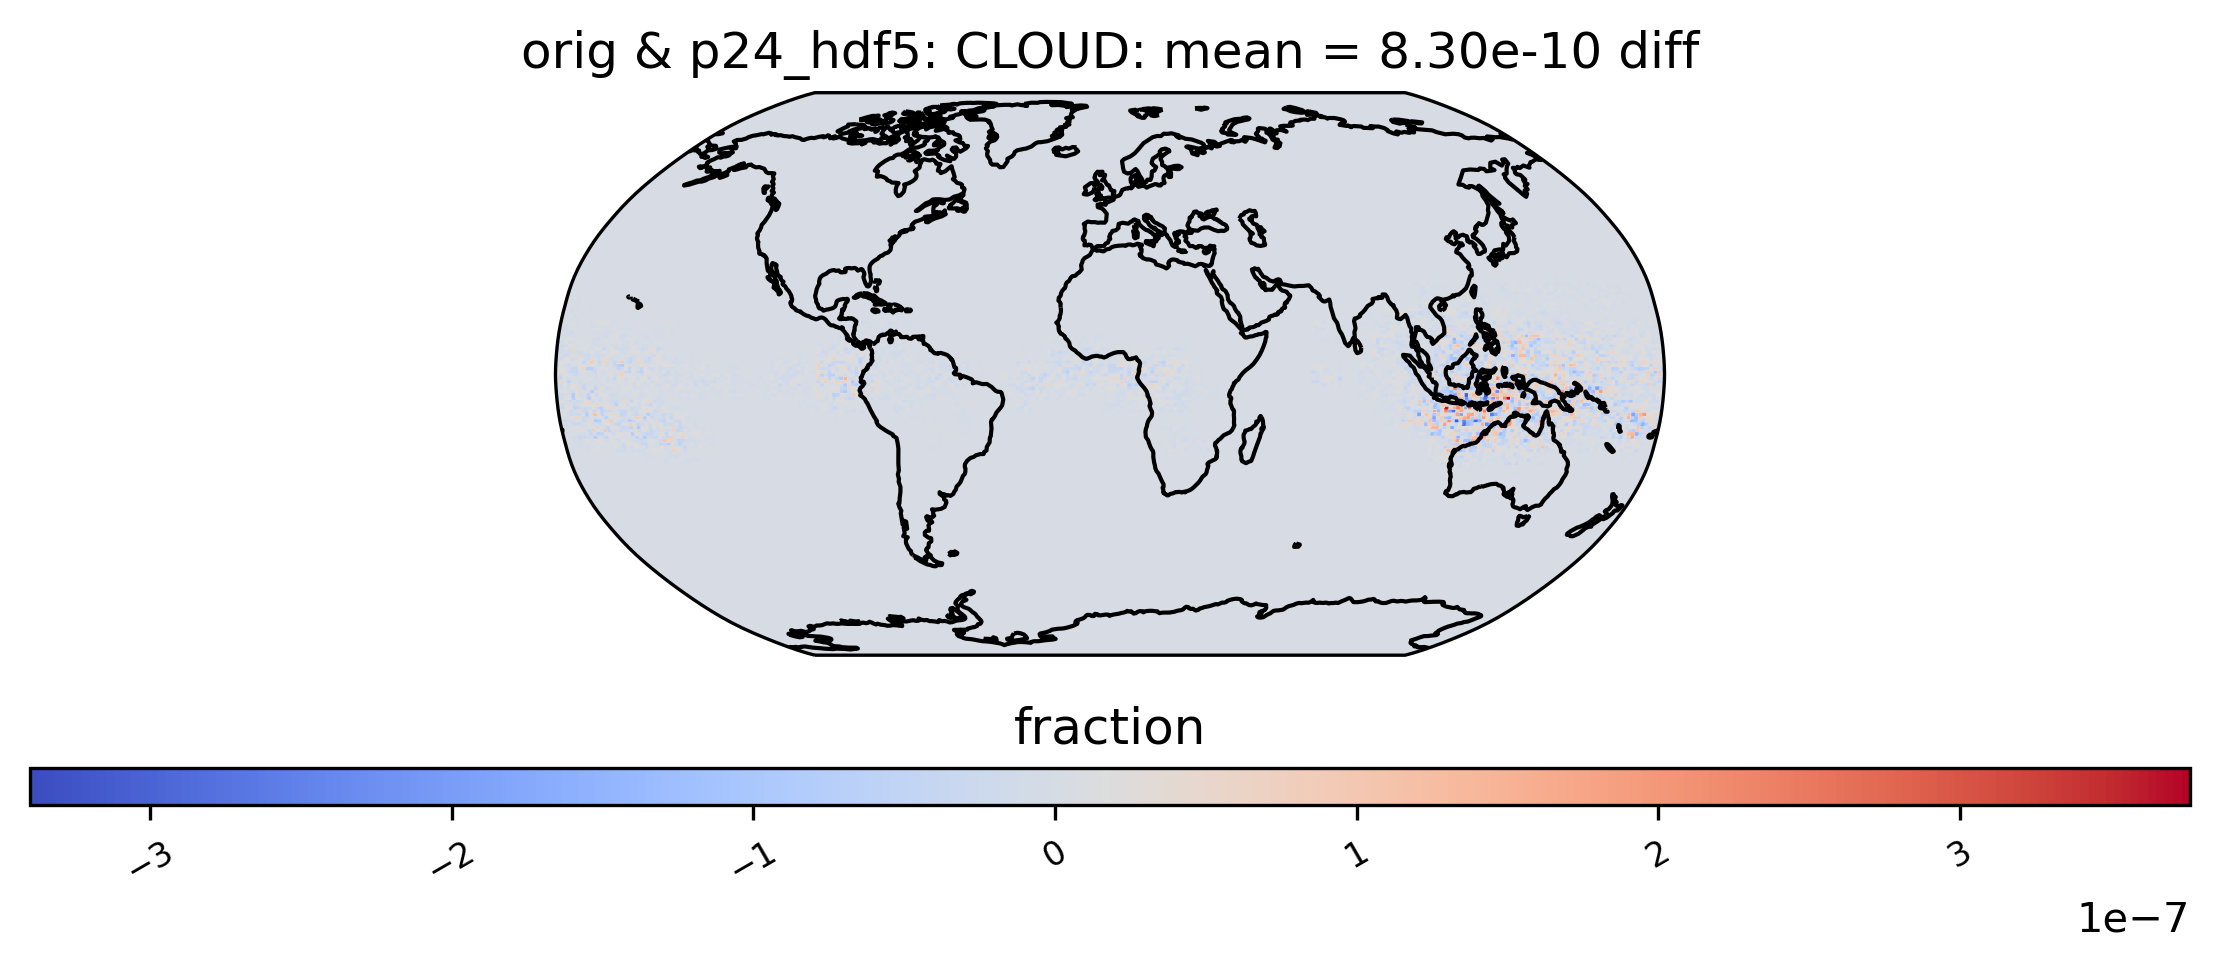

In [26]:
ldcpy.plot(
    col_cloud,
    "CLOUD",
    sets=["orig", "p24_hdf5"],
    calc="mean", calc_type="diff",
   color = "coolwarm", lev=5, start = 0, end = 1
)

In [8]:
c0_orig = col_cloud["CLOUD"].sel(collection="orig").isel(time=0).data.compute()
c0_p24 = col_cloud["CLOUD"].sel(collection="p24_hdf5").isel(time=0).data.compute()


In [9]:
c0_orig.shape

(30, 192, 288)

In [10]:
c0_orig_L5 = c0_orig[5,:,:]
c0_p24_L5 = c0_p24[5,:,:]

In [11]:
mask= c0_orig_L5 !=0
om = c0_orig_L5[mask]
cm = c0_p24_L5[mask]

In [16]:
mask2 = c0_p24_L5 != 0
om2 = c0_orig_L5[mask2]
cm2 = c0_p24_L5[mask2]


In [36]:
c0_orig_L5[100,184:197]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
c0_p24_L5[100,184:197]


array([ 0.0000000e+00,  4.5474735e-12,  4.0927262e-12,  5.9117156e-12,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -3.1974423e-13], dtype=float32)

In [43]:
d = om2 - cm2
min(abs(d))

1.110223e-16

In [15]:
ldcpy.compare_stats(
    ds,
    "CLOUD",
    ["orig","p24_hdf5" ],
    significant_digits=6,
)

,orig,p24_hdf5
mean,0.116248,0.116248
variance,0.0249524,0.0249524
standard deviation,0.157963,0.157963
min value,0,-1.2219e-06
min (abs) nonzero value,4.68547e-13,1.11022e-16
max value,0.984164,0.984164
probability positive,0.675796,0.717762
number of zeros,537816,396091
spatial autocorr - latitude,0.981704,0.981704
spatial autocorr - longitude,0.990778,0.990778


,p24_hdf5
max abs diff,2.80142e-06
min abs diff,0
mean abs diff,1.24619e-07
mean squared diff,1.87771e-21
root mean squared diff,2.29812e-07
normalized root mean squared diff,2.3842e-07
normalized max pointwise error,2.84649e-06
pearson correlation coefficient,1
ks p-value,0
spatial relative error(% > 0.0001),4.90608


In [ ]:
ldcpy.compare_stats(
    ds,
    "CLOUD",
    ["orig","p24_hdf5", "p24_pc", "p24_hdf5_2d", "p10_pc" ],
    significant_digits=6,
)

In [ ]:
ldcpy.plot(
    col_cloud,
    "CLOUD",
    sets=["orig", "p24_hdf5",  "p24_pc", "p24_hdf5_2d", "p10_pc"],
    calc="mean",
   color = "Blues", short_title=True, lev=10
)

In [ ]:
# diff between mean  values across the entire timeseries
ldcpy.plot(
    col_cloud,
    "CLOUD",
    sets=["orig", "p24_hdf5"],
    calc="mean",
    calc_type="diff", color = "Blues", short_title=True, lev=10
)

In [ ]:
# diff between mean  values across the entire timeseries
ldcpy.plot(
    col_cloud,
    "CLOUD",
    sets=["orig", "p10_pc"],
    calc="mean",
    calc_type="diff", color = "Blues", short_title=True, lev=2
)

In [ ]:
col_ts_zfp_hdf5 = ldcpy.open_datasets("cam-fv",
                                      ["TS"],
                                 [   "/glade/p/cisl/asap/CAM_lossy_test_data_31/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                  "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc",

                                 ],
                                 ["orig","zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p22", "zfp_p24"]
                                     )

In [ ]:
ldcpy.compare_stats(
    col_ts_zfp_hdf5.isel(time=10),
    "TS",
    [
        "orig",
        "zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p22", "zfp_p24"     ]
)

In [ ]:
col_prect_zfp_hdf5 = ldcpy.open_datasets("cam-fv",
                                      ["PRECT"],
                                 [   "/glade/p/cisl/asap/CAM_lossy_test_data_31/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_4/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                  "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_6/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_8/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_10/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_12/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_14/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_16/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_18/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_20/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                    "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_22/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                     "/glade/p/cisl/asap/CAM_lossy_test_data_31/research/zfp_hdf5/zfp_p_24/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.PRECT.20060101-20071231.nc",
                                 ],
                                 ["orig","zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p222", "zfp_p24"]
                                     )

In [ ]:
ldcpy.compare_stats(
    col_prect_zfp_hdf5.isel(time=10),
    "PRECT",
    [
        "orig",
        "zfp_p4", "zfp_p6", "zfp_p8", "zfp_p10", "zfp_p12", "zfp_p14", "zfp_p16", "zfp_p18", "zfp_p20", "zfp_p222", "zfp_p24"     ]
)

In [ ]:
col_ts_zfp = ldcpy.open_datasets("cam-fv",["TS"],
                                 ["/glade/work/abaker/zfp-stuff/zfp_hdf5/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.TS.200601-201012.nc", 
                                   "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_hdf_p16_c1.nc",
                                    "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_un_zfp_hdf_p16_c1.nc",
                                    "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_hdf_p16_c60.nc",
                                 "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_pc_p16_c60.nc",
                                "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_un_zfp_hdf_p16_c60.nc", 
                                 "/glade/work/abaker/zfp-stuff/zfp_hdf5/TS_zfp_pc_2D_p16_c60.nc",
                                "/glade/work/abaker/zfp-stuff/unbiased_zfp_hdf5/TS_un_zfp_p16_c1.nc",
                                "/glade/work/abaker/zfp-stuff/unbiased_zfp_hdf5/TS_un_zfp_p16_c60.nc",


                                 ], 
                                 ["orig", "zfp_hdf_c1","zfp_un_hdf_c1",
                                 "zfp_hdf_c60", 
                                  "pc_zfp_c60",
                                 "zfp_un_hdf_c60", "pc_zfp_c60_2d", "new_zfp_un_hdf_c1", "new_zfp_un_hdf_c60"])


In [ ]:
ldcpy.compare_stats(
    col_ts_zfp.isel(time=10),
    "TS",
    [
        "orig",
        "zfp_hdf_c1", "new_zfp_un_hdf_c1","new_zfp_un_hdf_c60",
    ]
)

In [ ]:
ldcpy.compare_stats(
    col_ts_zfp.isel(time=10),
    "TS",
    [
        "zfp_hdf_c1","new_zfp_un_hdf_c1"
    ]
)

In [ ]:
# diff between mean
ldcpy.plot(
    col_ts_zfp,
    "TS",
    sets=["orig", "zfp_hdf_c1", "new_zfp_un_hdf_c1"],
    calc="mean",
    calc_type="diff",
)

In [ ]:
# diff between mean
ldcpy.plot(
    col_ts_zfp,
    "TS",
    sets=["orig", "pc_zfp_c60_2d"],
    calc="mean",
    calc_type="diff",
)

In [ ]:
# Disconnect when finished
cluster.close()
client.close()